In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### BECOMING ONE WITH THE DATA

In [158]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [159]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [161]:
# Checking the number of passengers
print(f"The number of passengers is {len(train_df)}")

The number of passengers is 891


In [162]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Analyzing the data

In [163]:
for i in range(len(train_df.columns)):
    value_counts = train_df[train_df.columns[i]].value_counts().sum
    print(train_df.columns[i])
    print(value_counts)
    print("-----------------------")

PassengerId
<bound method NDFrame._add_numeric_operations.<locals>.sum of 1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64>
-----------------------
Survived
<bound method NDFrame._add_numeric_operations.<locals>.sum of 0    549
1    342
Name: Survived, dtype: int64>
-----------------------
Pclass
<bound method NDFrame._add_numeric_operations.<locals>.sum of 3    491
1    216
2    184
Name: Pclass, dtype: int64>
-----------------------
Name
<bound method NDFrame._add_numeric_operations.<locals>.sum of Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr

In [164]:
survived = (train_df["Survived"]==0).sum()
print(f"The number of passengers who survived are {survived}")
print(f"The number of passengers who died are {len(train_df) - survived}")

The number of passengers who survived are 549
The number of passengers who died are 342


<AxesSubplot:xlabel='Survived', ylabel='count'>

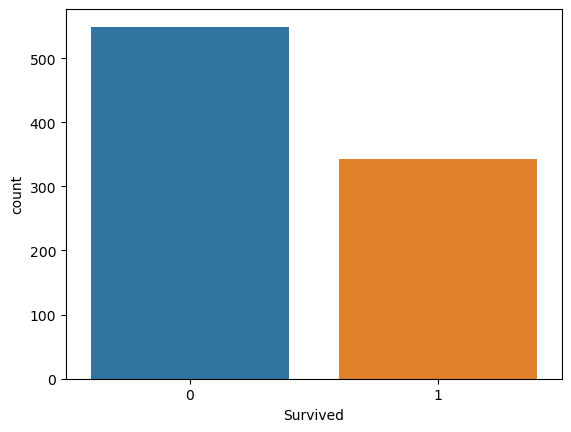

In [165]:
# Countplot to see how many survived
sns.countplot(x="Survived",data=train_df)
#0 - did not survive
#1 - survived

#### GENDER

In [166]:
male = (train_df["Sex"] == "male").sum()
print(f"The number of males - {male}")
print(f"The number of females - {len(train_df)-male}")

The number of males - 577
The number of females - 314


<AxesSubplot:xlabel='Survived', ylabel='count'>

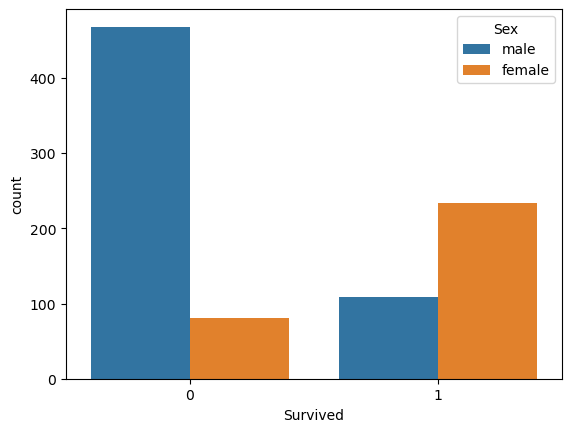

In [167]:
sns.countplot(x="Survived",hue="Sex",data=train_df)

In [168]:
train_df["Survived"].iloc[2]

1

In [169]:
male_survived = 0
female_survived = 0
for i in range(len(train_df)):
    if train_df["Sex"].iloc[i]=="male":
        if train_df["Survived"].iloc[i] == 1:
            male_survived+=1
    elif train_df["Sex"].iloc[i]=="female":
        if train_df["Survived"].iloc[i] == 1:
            female_survived+=1 

In [170]:
print(f"Total {male_survived} males out of {male} survived")
print(f"Total {female_survived} females survived out of {len(train_df) - male}")

Total 109 males out of 577 survived
Total 233 females survived out of 314


#### PClass

In [171]:
train_df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

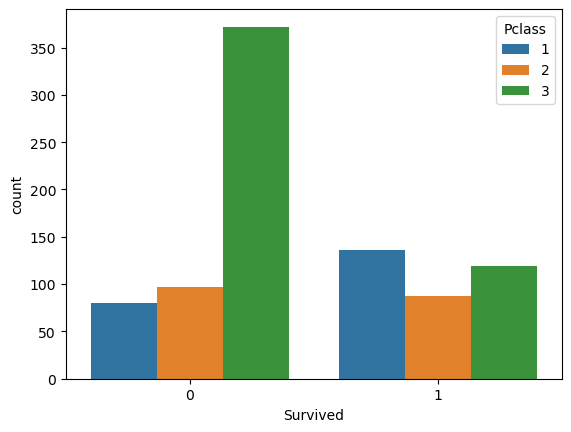

In [172]:
sns.countplot(x="Survived",hue="Pclass",data=train_df)

#### AGE

<AxesSubplot:ylabel='Frequency'>

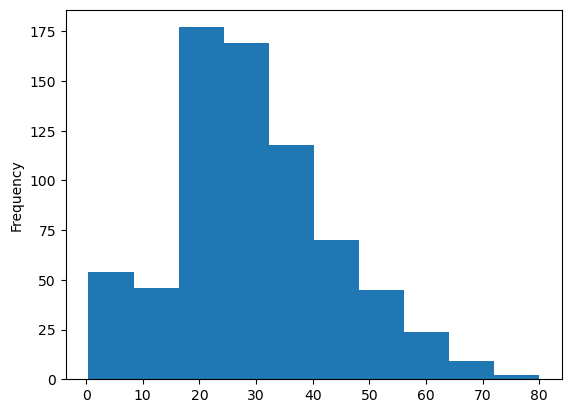

In [173]:
train_df["Age"].plot.hist()
#There were more 10-40 year old passengers travelling

In [174]:
# replacing Nan values by mean
train_df["Age"].isnull().sum()

177

In [175]:
train_df["Age"] = train_df["Age"].replace(0, np.NaN)
mean = int(train_df["Age"].mean(skipna=True))
train_df["Age"] = train_df["Age"].replace(np.NaN, mean)
        
    

In [176]:
train_df["Age"].isnull().sum()

0

<AxesSubplot:ylabel='Frequency'>

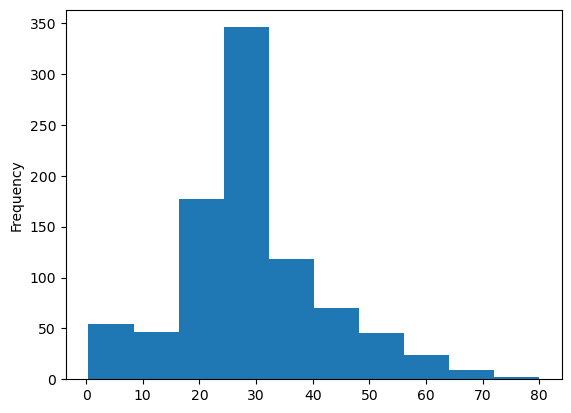

In [177]:
train_df["Age"].plot.hist()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

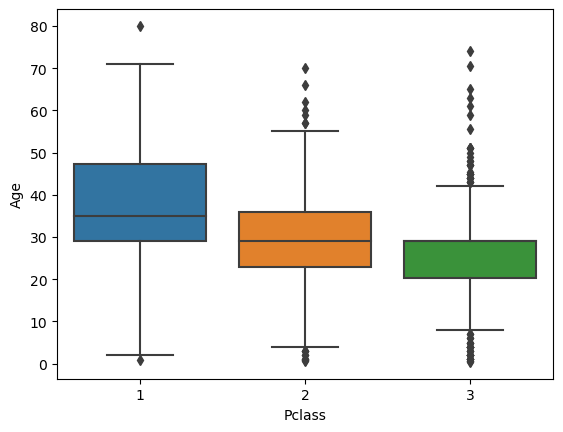

In [178]:
sns.boxplot(x="Pclass",y="Age",data=train_df)

In [179]:
train_df["SibSp"].value_counts() #Number of siblings and spouse on board

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [180]:
train_df["Parch"].value_counts() #Number of parents children pairs

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

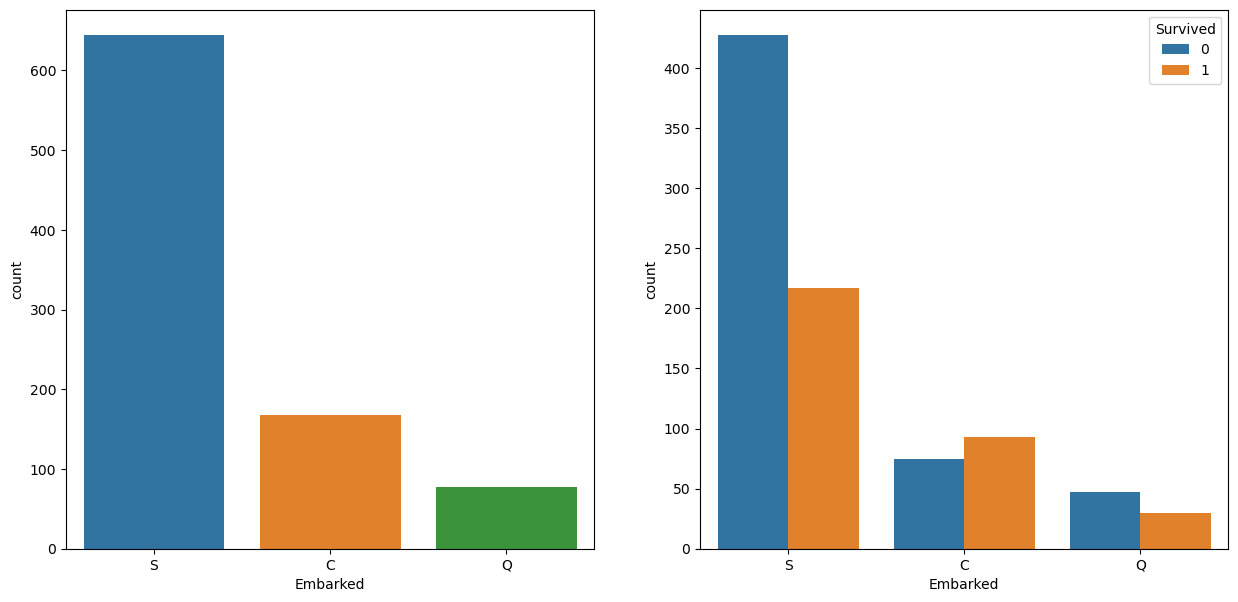

In [181]:
#Embarked - Embarked implies where the traveler mounted from. 
#There are three possible values for Embark — Southampton, Cherbourg, and Queenstown.

plt.figure(figsize=(15,7))

#fig = plt.figure(figsize=(15,7))
#fig.add_subplot(2,1,2)
plt.subplot(1,2,1)
sns.countplot(x="Embarked",data=train_df)

plt.subplot(1,2,2)
sns.countplot(x="Embarked",hue="Survived",data=train_df)

### PreProcessing The Data

In [182]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [183]:
train_df.drop("Name",axis=1,inplace=True)

In [184]:
train_df.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S


In [185]:
train_df.drop("Ticket",axis=1,inplace=True)

In [186]:
train_df["Fare"].describe() #We will standardise this

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [187]:
train_df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [188]:
train_df.drop("Cabin",axis=1,inplace=True)

In [189]:
train_df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


In [190]:
train_df["Sex"].isnull().sum()

0

In [191]:
def encode_gender(value):
    if value=="male":
        return 1
    elif value=="female":
        return 0
    
train_df["Sex"] = train_df["Sex"].apply(lambda x: encode_gender(x))
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [192]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [193]:
embarked = pd.get_dummies(train_df["Embarked"],drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [194]:
train_df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [195]:
Pclass = pd.get_dummies(train_df["Pclass"])
Pclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [196]:
train_df = pd.concat([train_df, embarked, Pclass],axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S,1,2,3
0,1,0,3,1,22.0,1,0,7.2500,S,0,1,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,C,0,0,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,S,0,1,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,S,0,1,1,0,0
4,5,0,3,1,35.0,0,0,8.0500,S,0,1,0,0,1


In [197]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_df[["Age","Fare"]])

StandardScaler()

In [198]:
scaled = scaler.transform(train_df[["Age","Fare"]])
scaled = pd.DataFrame(scaled,columns=["Age","Fare"])
scaled.head()

,Age,Fare
0,-0.581659,-0.502445
1,0.649327,0.786845
2,-0.273913,-0.488854
3,0.418517,0.420730
4,0.418517,-0.486337


In [199]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S,1,2,3
0,1,0,3,1,22.0,1,0,7.2500,S,0,1,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,C,0,0,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,S,0,1,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,S,0,1,1,0,0
4,5,0,3,1,35.0,0,0,8.0500,S,0,1,0,0,1


In [200]:
train_df.drop(["Age","Embarked","Pclass","Fare"],axis=1,inplace=True)
train_df.head()

,PassengerId,Survived,Sex,SibSp,Parch,Q,S,1,2,3
0,1,0,1,1,0,0,1,0,0,1
1,2,1,0,1,0,0,0,1,0,0
2,3,1,0,0,0,0,1,0,0,1
3,4,1,0,1,0,0,1,1,0,0
4,5,0,1,0,0,0,1,0,0,1


In [201]:
train_df = pd.concat([train_df, scaled],axis=1)
train_df.head()

,PassengerId,Survived,Sex,SibSp,Parch,Q,S,1,2,3,Age,Fare
0,1,0,1,1,0,0,1,0,0,1,-0.581659,-0.502445
1,2,1,0,1,0,0,0,1,0,0,0.649327,0.786845
2,3,1,0,0,0,0,1,0,0,1,-0.273913,-0.488854
3,4,1,0,1,0,0,1,1,0,0,0.418517,0.420730
4,5,0,1,0,0,0,1,0,0,1,0.418517,-0.486337


### TRAIN TEST SPLIT

In [226]:
from sklearn.model_selection import train_test_split

#Shuffling our data
train_df_shuffled = train_df.sample(frac=1, random_state=42)

#Traintestsplit
X = train_df_shuffled.drop("Survived",axis=1)
y = train_df_shuffled["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size=0.3 ,random_state=42)

In [227]:
len(X_train), len(X_test), len(y_train), len(y_test)

(623, 268, 623, 268)

### Creating helper functions

In [228]:
# Helper function to calculate all results
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred) *100
    # Calculate model precision, recall and f1 score using "weighted" average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
    return model_results

# MODEL 1 - LOGISTIC REGRESSION

Logistic regression estimates the relationship between a dependent variable and one or more independent variables and predicts a categorical variable versus a continuous one.

In [229]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

C:\Users\PROGRAMMING\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PROGRAMMING\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [230]:
log_preds = log_model.predict(X_test)
log_preds[:10]

C:\Users\PROGRAMMING\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [231]:
models = []
models.append("logistic_regression_results")
models

['logistic_regression_results']

In [232]:
logistic_regression_results = calculate_results(y_test, log_preds)
logistic_regression_results

{'accuracy': 78.73134328358209,
 'precision': 0.7952764373620618,
 'recall': 0.7873134328358209,
 'f1': 0.7894367545017793}

# MODEL 2: DECISSION TREE MODEL

In [233]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

In [234]:
dtree.fit(X_train, y_train)
dtree_preds = dtree.predict(X_test)
dtree_preds[:10]

C:\Users\PROGRAMMING\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PROGRAMMING\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [236]:
models.append("decision_tree_results")
decision_tree_results = calculate_results(y_test, dtree_preds)
decision_tree_results

{'accuracy': 74.6268656716418,
 'precision': 0.752486491625193,
 'recall': 0.746268656716418,
 'f1': 0.748337279361404}

#### HYPERPARAMETER_TUNING -  N_ESTIMATORS AND MAX DEPTH

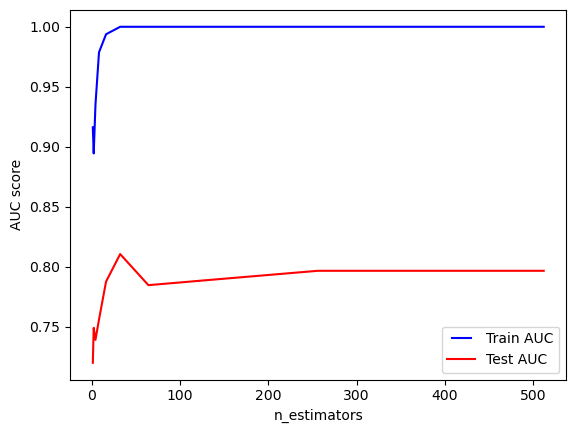

In [247]:
import warnings
warnings.filterwarnings('ignore')

# MODEL 3: RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

#Finding the right estimators
n_estimators = [1,2,4,8,16,32,64,128,256,512]
train_results = []
test_results = []

for n_estimator in n_estimators:
    random_forest_model = RandomForestClassifier(n_estimators= n_estimator, n_jobs= -1)
    random_forest_model.fit(X_train, y_train)
    
    train_pred = random_forest_model.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = random_forest_model.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

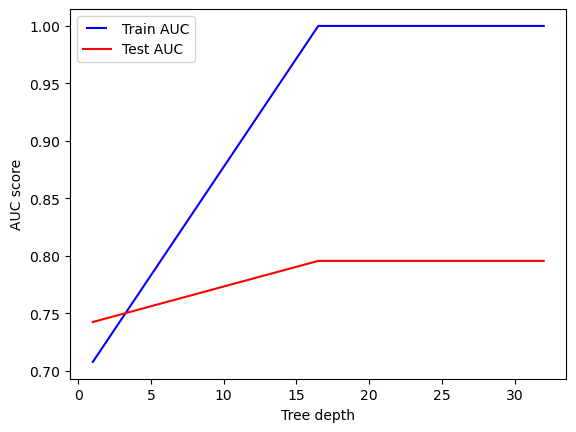

In [265]:
max_depths = np.linspace(1, 32, 3, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train) 
    
    train_pred = rf.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

    
    from matplotlib.legend_handler import HandlerLine2D
line1,= plt.plot(max_depths, train_results, "b",label= "Train AUC")
line2,= plt.plot(max_depths, test_results, "r" ,label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

In [273]:
random_forest_model = RandomForestClassifier(n_estimators=40, n_jobs=-1,max_depth=4)
random_forest_model.fit(X_train, y_train)

random_forest_preds = random_forest_model.predict(X_test)
random_forest_preds[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [274]:
models.append("random_forest_model_results")
random_forest_results = calculate_results(y_test, random_forest_preds)
random_forest_results

{'accuracy': 81.71641791044776,
 'precision': 0.8153971373370302,
 'recall': 0.8171641791044776,
 'f1': 0.81529988841875}

In [277]:
models = models[:3]
models

['logistic_regression_results',
 'decision_tree_results',
 'random_forest_model_results']

In [278]:
random_forest_results

{'accuracy': 81.71641791044776,
 'precision': 0.8153971373370302,
 'recall': 0.8171641791044776,
 'f1': 0.81529988841875}

In [282]:
## Making a Dataset from these 
results = pd.DataFrame({"Logistic_Regression":logistic_regression_results,
                       "Decision Tree":decision_tree_results,
                       "Random Forest":random_forest_results})

results = results.transpose()
results.head()

,accuracy,precision,recall,f1
Logistic_Regression,78.731343,0.795276,0.787313,0.789437
Decision Tree,74.626866,0.752486,0.746269,0.748337
Random Forest,81.716418,0.815397,0.817164,0.815300


### Getting Some result visualizations

In [283]:
results["accuracy"] = results["accuracy"]/100
results.head(2)

,accuracy,precision,recall,f1
Logistic_Regression,0.787313,0.795276,0.787313,0.789437
Decision Tree,0.746269,0.752486,0.746269,0.748337


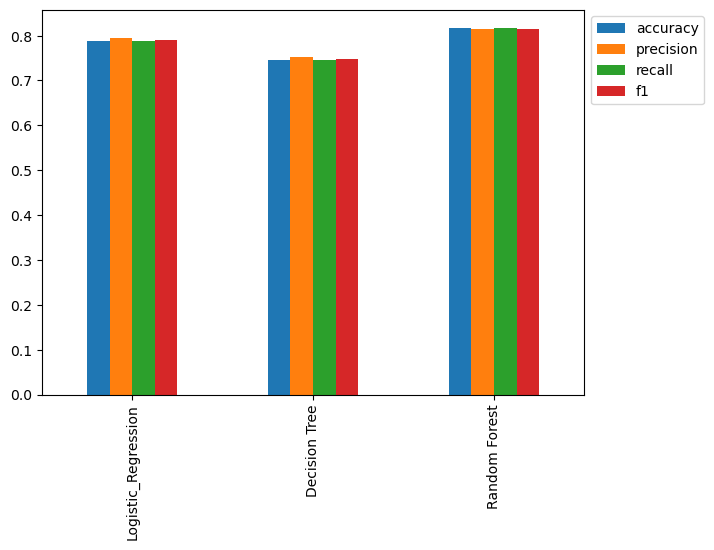

In [287]:
results.plot(kind="bar",figsize=(7,5)).legend(bbox_to_anchor=(1.0,1.0))